## INSTRUCTIONS - IMPORTANT:

Every student is expected to submit their own, original solutions for this assignment. While collaborative discussions among classmates are encouraged for better understanding, it is crucial that the work you submit is your own. Copying or replicating someone else's solutions is a breach of academic integrity and will not be tolerated. The use of **AI tools** is also **prohibited** for this assignment.

The dataset used in this assignment is derived from Inside Airbnb, available [here](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-06-05/visualisations/listings.csv). It is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

**Please note that this dataset has been modified and adapted for the scope of this academic assignment. If you are interested in the original data or further Airbnb datasets, we encourage you to visit Inside Airbnb's website: [insideairbnb.com](http://insideairbnb.com).**


<h3> This assignment is divided into two main components: </h3>

1. **Data Manipulation**: Focused on cleaning and preparing the dataset.
2. **Exploratory Data Analysis (EDA)**: Concentrated on analyzing and interpreting the data.

# PART-1 (Data Cleaning and Manipulation)

We will begin by importing the required modules and reading the data file.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("airbnb_final.csv")

In [3]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484.0,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647.0,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


### 1.1. **What is the shape of the dataset?**

In [5]:
#Code goes here
df.shape

(7608, 15)

### 1.2 **Identify the data types of each column. Are there any columns that need type conversion?**

In [11]:
# 1.2.1 Code to identify data types goes here.
#iterates each column in the data fram and prints data type using dtaaframe.dtype method
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

host_id: float64
neighbourhood: object
latitude: float64
longitude: float64
room_type: object
price in $: float64
minimum_nights: float64
availability_365: float64
Apartment_type: object
City: object
Rating: float64
No_of_bed_rooms: float64
No_of_beds: float64
No_of_bathrooms: float64
Bathroom_type: object


In [13]:
# 1.2.3 change the host_id column to an integer 
df['host_id'] = df['host_id'].fillna(0).astype('int64')

### 1.3. **Are there any duplicate rows in the dataset? If yes, how would you handle them?**

In [16]:
# 1.3.1 check for duplicate values
df.duplicated().sum()

0

### 1.4. **Check for missing values, How would you handle the missing values in the dataset?**

In [19]:
# 1.4.1 check for missing values
df.isnull().sum()

host_id                0
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $            10
minimum_nights         9
availability_365       1
Apartment_type         1
City                   1
Rating              1578
No_of_bed_rooms      284
No_of_beds            17
No_of_bathrooms      804
Bathroom_type          1
dtype: int64

In [21]:
# 1.4.3 Populate missing values in the 'price in $' column with the mean.
df['price in $'] = df['price in $'].fillna(df['price in $'].mean())

In [23]:
# 1.4.4 Verify that there are no more missing values in the 'price in $' column
df['price in $'].isnull().sum()

0

In [25]:
# 1.4.5 Populate all missing values in the City column with "Amsterdam"
df['City'] = df['City'].fillna("Amsterdam")
df['City'].isnull().any()

False

In [27]:
# 1.4.7 Drop all remaining rows with missing data. Store the result in a new dataframe called df2.
df2 = df.dropna(subset = ['neighbourhood','latitude', 'longitude','minimum_nights','availability_365','Apartment_type','Rating','No_of_bed_rooms','No_of_beds','No_of_bathrooms','Bathroom_type'])

In [29]:
df2.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
2,1100324,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private
5,776296,De Baarsjes - Oud-West,52.36270,4.85693,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,private


### 1.5. Compare the shapes of the original (df) and new (df2) dataframes, and verify there are no missing values in df2.

In [32]:
# 1.5.1 code to show shapes of old and new dataframes
print("Shape of previous data frame: ", df.shape)
print("Shape of new data frame: ", df2.shape)

Shape of previous data frame:  (7608, 15)
Shape of new data frame:  (5108, 15)


In [34]:
# 1.5.2 Code to verify no missing values
df2.isnull().sum()

host_id             0
neighbourhood       0
latitude            0
longitude           0
room_type           0
price in $          0
minimum_nights      0
availability_365    0
Apartment_type      0
City                0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

### 1.6. **Drop the 'latitude' and 'longitude' columns. How does it affect the shape of the dataset?**

Note: from here forward, work with the df2 DataFrame.

In [38]:
# 1.6.1 Code goes here
# axis = 1 drop cols
df2 = df2.drop(columns=['latitude', 'longitude'],axis=1)

In [40]:
# 1.6.2 Show new shape
df2.shape #number of columns decreases from 15 to 13

(5108, 13)

### 1.7. **List the  unique values in Apartment_type and Bathroom_type**

In [43]:
# 1.7.1 Find and list the unique apartment tpyes.
df2.Apartment_type.unique()

array(['Condo', 'Rental unit', 'Houseboat', 'Boutique hotel',
       'Guest suite', 'Home', 'Loft', 'Boat', 'Bed and breakfast',
       'Townhouse', 'Chalet', 'Guesthouse', 'Farm stay',
       'Serviced apartment', 'Barn', 'Hotel', 'Cabin', 'Villa',
       'Place to stay', 'Tiny home', 'Cottage', 'Nature lodge', 'Tower',
       'Hostel', 'Aparthotel', 'Camper/RV', 'Earthen home',
       'casa particular', 'Vacation home', 'Tent'], dtype=object)

In [45]:
# 1.7.2 Find and list the unique bathroom types.
df2.Bathroom_type.unique()

array(['shared', 'private'], dtype=object)

### 1.8. **Replace the bathroom types (shared and private) with integers (0 and 1).**

In [48]:
# 1.8.1 Replace the strings with integers
df2 = df2.replace({'Bathroom_type' : {'shared' : '0', 'private' : '1'}})
df2['Bathroom_type'] = df2['Bathroom_type'].astype('int64')

In [50]:
# 1.8.2 Verify the changes
df2['Bathroom_type'].info()
df2.Bathroom_type.unique()

<class 'pandas.core.series.Series'>
Index: 5108 entries, 0 to 7478
Series name: Bathroom_type
Non-Null Count  Dtype
--------------  -----
5108 non-null   int64
dtypes: int64(1)
memory usage: 79.8 KB


array([0, 1], dtype=int64)

# Part - 2 (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. 

### 2.1. **Describe the data.**

In [55]:
# Describe data here.
df2.describe()

,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
count,5.108000e+03,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000
mean,8.957354e+07,250.071427,5.344949,68.873727,4.828872,1.615114,1.615114,1.316856,0.904268
std,1.283283e+08,239.576562,40.127865,100.861524,0.214108,0.891545,0.891545,0.467762,0.294252
min,0.000000e+00,18.000000,1.000000,0.000000,1.670000,1.000000,1.000000,0.000000,0.000000
25%,8.946164e+06,149.000000,2.000000,0.000000,4.750000,1.000000,1.000000,1.000000,1.000000
50%,2.942286e+07,205.500000,3.000000,12.000000,4.890000,1.000000,1.000000,1.000000,1.000000
75%,1.051994e+08,300.000000,4.000000,114.000000,5.000000,2.000000,2.000000,1.500000,1.000000
max,5.126757e+08,10000.000000,1001.000000,365.000000,5.000000,10.000000,10.000000,5.500000,1.000000


### 2.2. **Identify significant correlations.**

In [58]:
# 2.2.1 Build the correlation matrix
print("************CORRELATION MATRIX************\n")
df2.corr(numeric_only=True)
#corr_kendall = df2.corr(method = 'kendall', numeric_only=True)
#corr_spearman = df2.corr(method = 'spearman', numeric_only=True)
#print("************CORRELATION MATRICES************\n")
#print("PEARSON CORRELATION MATRIX:\n", corr_pearson, "\n\nKENDALL CORRELATION MATRIX:\n", corr_kendall, "\n\nSPEARMAN CORRELATION MATRIX:\n", corr_spearman)

************CORRELATION MATRIX************



,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
host_id,1.000000,0.042410,-0.009971,0.165185,-0.164723,-0.071205,-0.071205,-0.046735,-0.066510
price in $,0.042410,1.000000,-0.003072,0.171706,0.045040,0.292805,0.292805,0.266971,0.171660
minimum_nights,-0.009971,-0.003072,1.000000,0.011592,0.011779,0.005830,0.005830,-0.004859,0.002631
availability_365,0.165185,0.171706,0.011592,1.000000,-0.167042,-0.065623,-0.065623,-0.028057,-0.178860
Rating,-0.164723,0.045040,0.011779,-0.167042,1.000000,0.035783,0.035783,0.072711,0.174168
No_of_bed_rooms,-0.071205,0.292805,0.005830,-0.065623,0.035783,1.000000,1.000000,0.475608,0.188682
No_of_beds,-0.071205,0.292805,0.005830,-0.065623,0.035783,1.000000,1.000000,0.475608,0.188682
No_of_bathrooms,-0.046735,0.266971,-0.004859,-0.028057,0.072711,0.475608,0.475608,1.000000,0.102347
Bathroom_type,-0.066510,0.171660,0.002631,-0.178860,0.174168,0.188682,0.188682,0.102347,1.000000


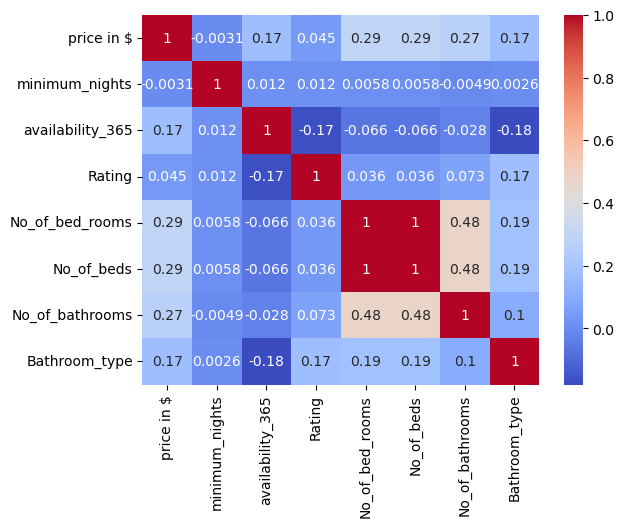

In [60]:
# 2.2.2 Display the correlation matrix as a heatmap
sns.heatmap(df2.corr(numeric_only=True).drop(
  ['host_id'], axis=1).drop(['host_id'], axis=0),
            annot = True, cmap='coolwarm');
plt.show()

### 2.3. **Check if is there any multicollinearity.**

In [63]:
#Import the statsmodels tools needed to perform VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [64]:
# 2.3.1 Select all numerical columns *except* host_id.
num_col_no_hostid = df2.select_dtypes(include='number')
num_col_no_hostid = num_col_no_hostid.drop('host_id', axis=1)
print(num_col_no_hostid)

      price in $  minimum_nights  availability_365  Rating  No_of_bed_rooms  \
0           69.0             3.0               7.0    4.89              1.0   
2          270.0             4.0               2.0    4.86              3.0   
3          200.0             3.0               0.0    4.76              1.0   
4          137.0             3.0               0.0    4.94              1.0   
5          170.0             3.0             157.0    4.77              1.0   
...          ...             ...               ...     ...              ...   
7364       406.0             1.0             286.0    4.71              1.0   
7365       339.0             1.0             235.0    3.67              1.0   
7416        99.0             1.0              95.0    4.86              1.0   
7425       106.0             1.0              19.0    5.00              1.0   
7478       316.0             4.0              12.0    5.00              2.0   

      No_of_beds  No_of_bathrooms  Bathroom_type  


In [67]:
# 2.3.2 Make sure there are no missing (NaN) values 
num_col_no_hostid.isnull().sum()

price in $          0
minimum_nights      0
availability_365    0
Rating              0
No_of_bed_rooms     0
No_of_beds          0
No_of_bathrooms     0
Bathroom_type       0
dtype: int64

In [69]:
# 2.3.3 Add a constant column for the VIF calculation
num_col_no_hostid['vif'] = 100

In [71]:
# 2.3.4 Calculate the VIF for each of the columns and display the information.(Make E.C.?)
#since there's high collinearity b/w 'No_of_bed_rooms' and 'No_of_beds' R**2 becomes 1
DISPLAY_VIF = pd.DataFrame(columns = ['FEATURES','VIF'])
vif_calc = variance_inflation_factor 
for p in range(1,num_col_no_hostid.shape[1]):
    col_p = num_col_no_hostid.columns[p]
    if np.var(num_col_no_hostid[col_p]) > 0:
        DISPLAY_VIF.loc[len(DISPLAY_VIF)] = [vif_calc(num_col_no_hostid.values, p), col_p]
print(DISPLAY_VIF)

   FEATURES               VIF
0  1.000520    minimum_nights
1  1.114930  availability_365
2  1.058086            Rating
3       inf   No_of_bed_rooms
4       inf        No_of_beds
5  1.328305   No_of_bathrooms
6  1.118485     Bathroom_type


C:\Users\mettu\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\mettu\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### 2.4. **Spot outliers in the dataset.**
(we will not remove outliers for this homework).

<Axes: xlabel='price in $'>

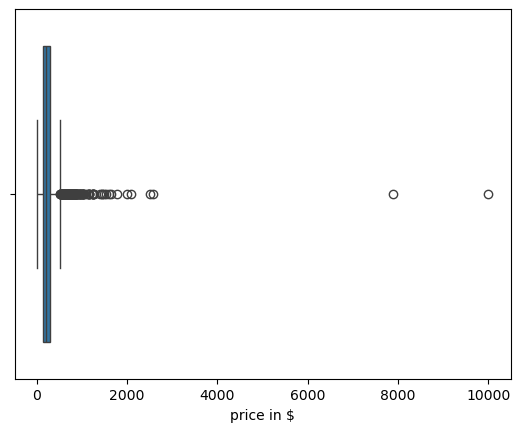

In [74]:
# 2.4.1. Show boxplot of price in $ 
sns.boxplot(x='price in $', data=df2)

maximum price in $: 10000.0


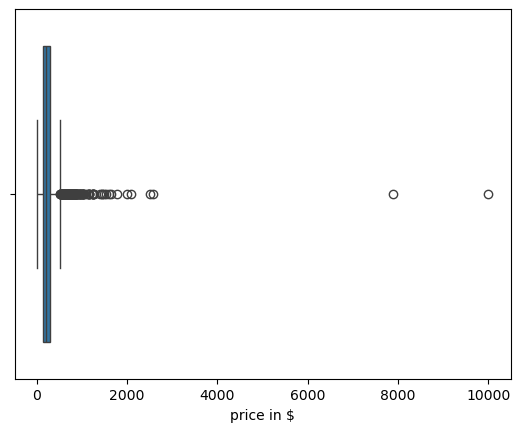

In [76]:
# 2.4.2 Show the maximum price in $
sns.boxplot(x=df2['price in $'])
max_price = df2['price in $'].max()
print("maximum price in $:", max_price)

<Axes: xlabel='minimum_nights'>

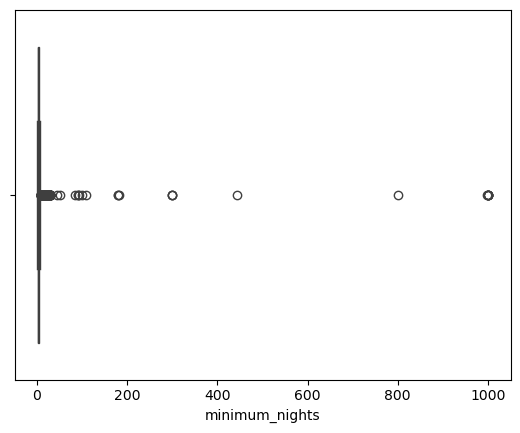

In [78]:
# 2.4.3 Show a boxplot for minimum_nights
sns.boxplot(x='minimum_nights', data=df2)

<Axes: xlabel='Rating'>

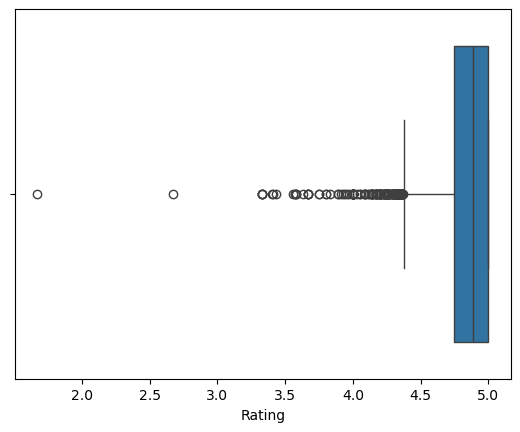

In [80]:
# 2.4.4 Show a boxplot for Rating
sns.boxplot(x='Rating', data=df2)

In [113]:
# 2.4.5 Define a function to drop outliers beyond a specific multiplier of the IQR.
def del_outliers(df2, col_id, f_mul=1.5):
    Q1 = np.percentile(df2[col_id], 25, interpolation='midpoint')
    Q3 = np.percentile(df2[col_id], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    upper_bound = Q3 + f_mul * IQR
    lower_bound = Q1 - f_mul * IQR
    outliers = df2[(df2[col_id] >= upper_bound) | (df2[col_id] <= lower_bound)]
    df_del_outliers = df2[~df2.index.isin(outliers.index)]
    return df_del_outliers

#del_outliers(df2, 'Rating', f_mul=1.5)
    

In [115]:
# 2.4.6 Find outliers for 'price in $', 'minimum_nights', and 'Rating' using the standard multiplier (1.5)
outlier_var = df2.index
for col_idxx in ['price in $', 'minimum_nights', 'Rating']:
    df2_outlier_collection = del_outliers(df2, col_idxx, f_mul=1.5)
    outlier_var = outlier_var.intersection(df2_outlier_collection.index)

outlier_list = df2[~df2.index.isin(outlier_var)]
print("Outliers in given columns: ")
print(outlier_list)

Outliers in given columns: 
        host_id            neighbourhood        room_type  price in $  \
14      1005087             Centrum-West  Entire home/apt       675.0   
15       856540  De Pijp - Rivierenbuurt  Entire home/apt       480.0   
24       922787                     Zuid  Entire home/apt       250.0   
38      1451657                     Zuid  Entire home/apt      1036.0   
43       907405   De Baarsjes - Oud-West  Entire home/apt       260.0   
...         ...                      ...              ...         ...   
7283   29891866  De Pijp - Rivierenbuurt  Entire home/apt       250.0   
7302  189511137             Centrum-West     Private room       164.0   
7357  311321908             Centrum-West     Private room       539.0   
7359  245303717             Centrum-Oost  Entire home/apt       550.0   
7365  311321908             Centrum-West     Private room       339.0   

      minimum_nights  availability_365 Apartment_type       City  Rating  \
14               2.

C:\Users\mettu\AppData\Local\Temp\ipykernel_7572\1510722277.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df2_outlier_collection = del_outliers(df2, col_idxx, f_mul=1.5)


In [86]:
# 2.4.7 Display the count of outliers in each selected column
num_outlier_set = {}
for col_idxx in ['price in $', 'minimum_nights', 'Rating']:
    df2_outlier_collection = del_outliers(df2, col_idxx, f_mul=1.5)
    num_outlier = len(df2) - len(df2_outlier_collection)
    num_outlier_set[col_idxx] = num_outlier

print("#outliers in each of given columns: ")
for col_idxx, i_cnt in num_outlier_set.items():
    print(f"{col_idxx}: {i_cnt}")

#outliers in each of given columns: 
price in $: 232
minimum_nights: 380
Rating: 209


C:\Users\mettu\AppData\Local\Temp\ipykernel_7572\733026110.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df2_outlier_collection = del_outliers(df2, col_idxx, f_mul=1.5)


In [88]:
# 2.4.8 Find outliers for the same column using a multiplier of 3.
Outliers_mul_3 = pd.concat([df2[~df2.index.isin(del_outliers(df2, col_idxx, f_mul=3).index)] for col_idxx in ['price in $', 'minimum_nights', 'Rating']])
print(f"Result:\n{Outliers_mul_3}")

Result:
        host_id            neighbourhood        room_type  price in $  \
38      1451657                     Zuid  Entire home/apt      1036.0   
60    176944339               Westerpark  Entire home/apt      1239.0   
129     4398387  De Pijp - Rivierenbuurt  Entire home/apt       800.0   
188     5714947             Centrum-West  Entire home/apt       950.0   
191     5750100             Centrum-Oost  Entire home/apt       970.0   
...         ...                      ...              ...         ...   
6914    4915746            Bos en Lommer     Private room        50.0   
6999  371219931            Bos en Lommer  Entire home/apt       140.0   
7040  502914333                Oud-Noord     Private room       150.0   
7114  508078823   De Baarsjes - Oud-West     Private room       117.0   
7365  311321908             Centrum-West     Private room       339.0   

      minimum_nights  availability_365     Apartment_type       City  Rating  \
38               2.0             25

C:\Users\mettu\AppData\Local\Temp\ipykernel_7572\1526938839.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Outliers_mul_3 = pd.concat([df2[~df2.index.isin(del_outliers(df2, col_idxx, f_mul=3).index)] for col_idxx in ['price in $', 'minimum_nights', 'Rating']])


In [90]:
# 2.4.9 Display the new count of outliers in each selected column
num_outlier_set = {}
for col_idxx in ['price in $', 'minimum_nights', 'Rating']:
    df2_outlier_collection = del_outliers(df2, col_idxx, f_mul=3)
    num_outlier = len(df2) - len(df2_outlier_collection)
    num_outlier_set[col_idxx] = num_outlier

print("#outliers in each of given columns: ")
for col_idxx, i_cnt in num_outlier_set.items():
    print(f"{col_idxx}: {i_cnt}")

#outliers in each of given columns: 
price in $: 71
minimum_nights: 150
Rating: 59


C:\Users\mettu\AppData\Local\Temp\ipykernel_7572\434294029.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df2_outlier_collection = del_outliers(df2, col_idxx, f_mul=3)


### 2.5. **Compute the Average Price for Each Type of Listing.**

In [93]:
# 2.5.1 Group the data by 'room_type' and calculate the average price for each type
df_avg = df2.groupby(['room_type'])['price in $'].mean()
print(df_avg)

room_type
Entire home/apt    267.956400
Hotel room         195.833333
Private room       163.124324
Shared room        162.916667
Name: price in $, dtype: float64


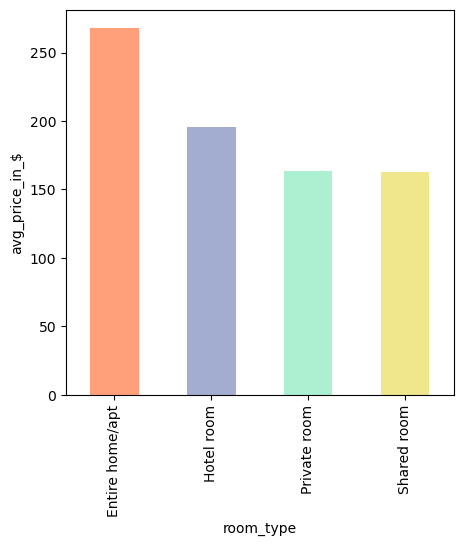

In [95]:
# 2.5.2 Plot and display the average price for each room type
plt.figure(figsize=(5, 5))
colour_list = ['#ffa07a', '#a2add0', '#aaf0d1', '#f0e68c' ]
df_avg.plot(kind='bar', color = colour_list)
plt.xlabel('room_type')
plt.ylabel('avg_price_in_$')
plt.show()

### 2.6. **How Many Listings Are There for Each Unique 'Apartment Type'?**

In [98]:
# 2.6.1 Count the frequency of each unique 'Apartment_type'
frq_apt = df2['Apartment_type'].value_counts()
print("Frequency of each Apartment_type:")
print(frq_apt)

Frequency of each Apartment_type:
Apartment_type
Rental unit           2448
Condo                 1104
Home                   449
Townhouse              234
Loft                   159
Houseboat              154
Bed and breakfast      130
Boat                   102
Serviced apartment      66
Guest suite             51
Hostel                  42
Boutique hotel          40
Hotel                   34
Guesthouse              17
Villa                   14
Place to stay           12
Vacation home           12
casa particular         10
Aparthotel               9
Tiny home                6
Cabin                    4
Cottage                  2
Chalet                   2
Farm stay                1
Earthen home             1
Nature lodge             1
Camper/RV                1
Tower                    1
Barn                     1
Tent                     1
Name: count, dtype: int64


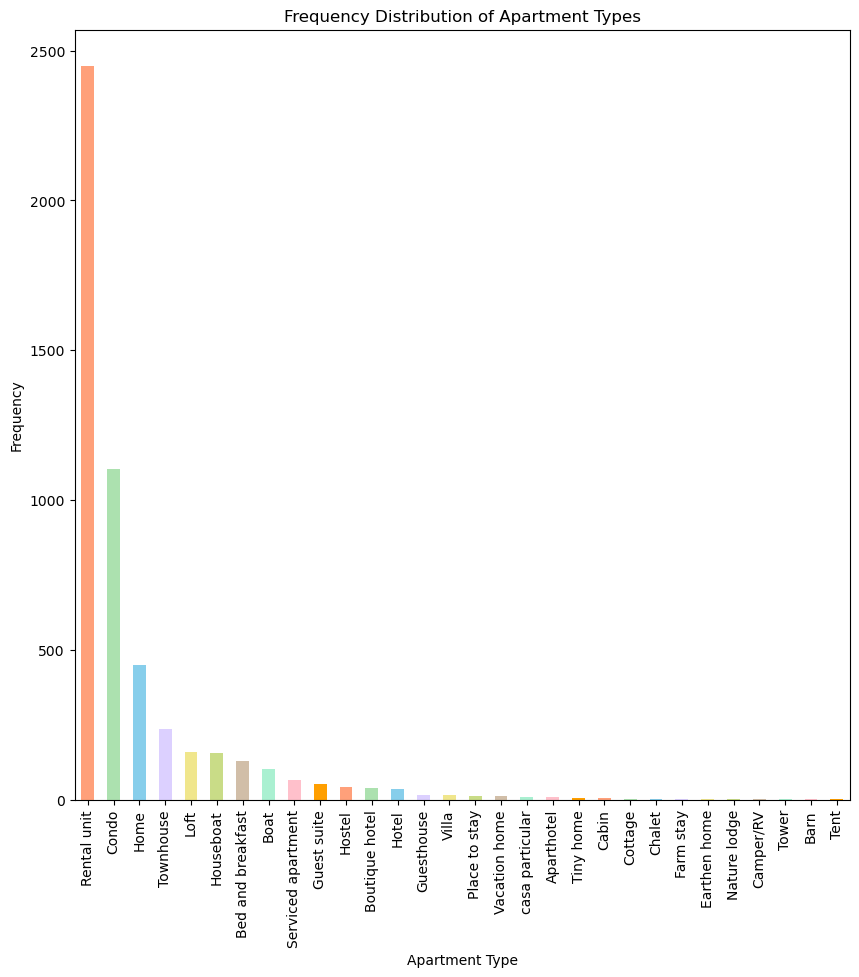

In [100]:
# 2.6.2 Plot the frequency distribution of 'Apartment_type'
plt.figure(figsize=(10, 10))
colour_list = ['#ffa07a', '#ace1af', '#87ceeb', '#dcd0ff', '#f0e68c', '#c9dc87', '#d1bea8', '#aaf0d1', '#ffc0cb', '#ff9f00' ]
df2['Apartment_type'].value_counts().plot(kind='bar', color = colour_list)
plt.title('Frequency Distribution of Apartment Types')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.show()

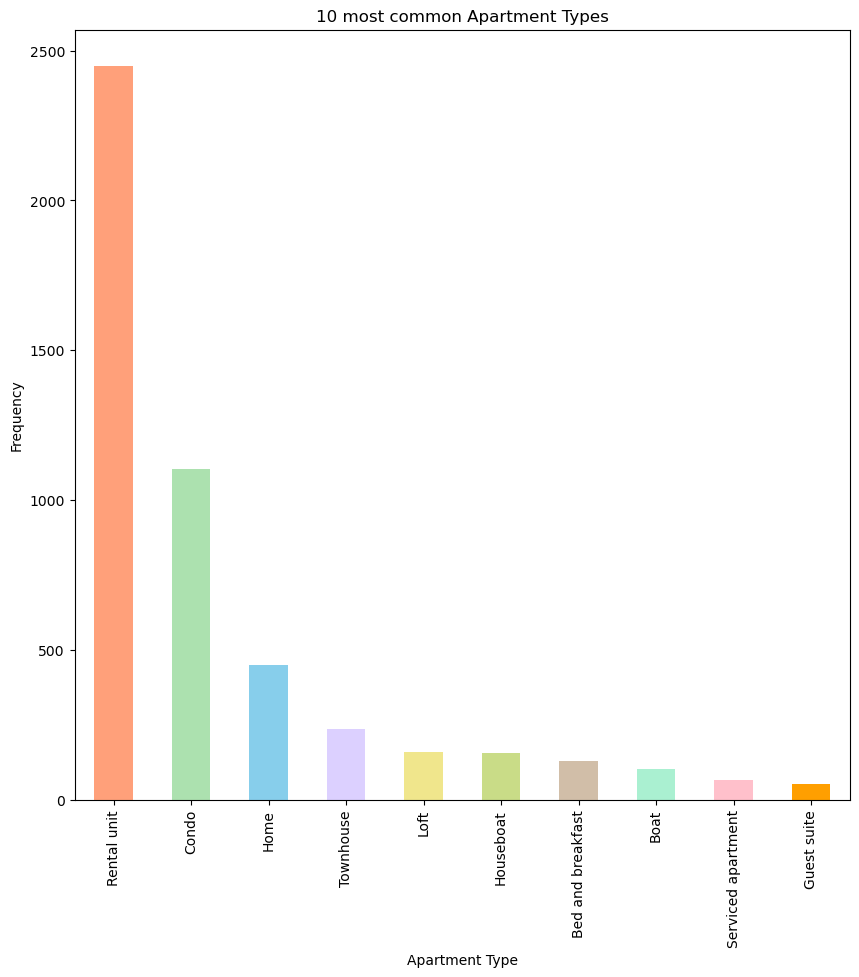

In [102]:
# 2.6.3. Find, Plot, and Display the top 10 most common apartment types
plt.figure(figsize=(10, 10))
colour_list = ['#ffa07a', '#ace1af', '#87ceeb', '#dcd0ff', '#f0e68c', '#c9dc87', '#d1bea8', '#aaf0d1', '#ffc0cb', '#ff9f00' ]
df2['Apartment_type'].value_counts().nlargest(10).plot(kind='bar', color = colour_list)
plt.title('10 most common Apartment Types')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.show()

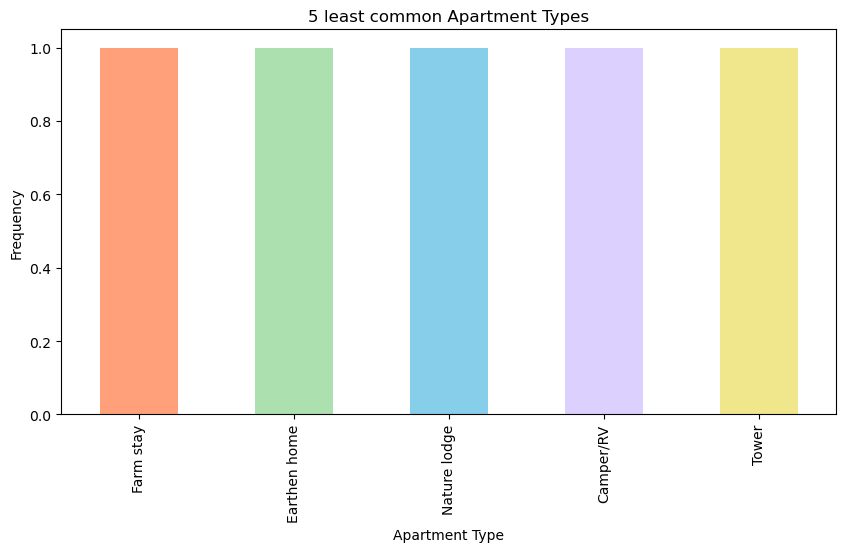

In [104]:
# 2.6.4 Find, Plot, and Display the bottom 5 least common apartment types
plt.figure(figsize=(10, 5))
colour_list = ['#ffa07a', '#ace1af', '#87ceeb', '#dcd0ff', '#f0e68c']
df2['Apartment_type'].value_counts().nsmallest(5).plot(kind='bar', color = colour_list)
plt.title('5 least common Apartment Types')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.show()

### 2.7. **Identify the Top 5 Neighbourhoods with the Highest Average Listing Prices.**

In [107]:
# 2.7.1 Find the top 5 most expensive neighbourhoods based on average price
nbhd_avg_price = df2.groupby('neighbourhood')['price in $'].mean()
top5_list = nbhd_avg_price.nlargest(5)
print(f"Top 5 most expensive neighbourhoods:\n{top5_list}")

Top 5 most expensive neighbourhoods:
neighbourhood
Centrum-West                332.298308
Centrum-Oost                305.447601
Zuid                        271.715134
De Pijp - Rivierenbuurt     267.334606
IJburg - Zeeburgereiland    262.265746
Name: price in $, dtype: float64


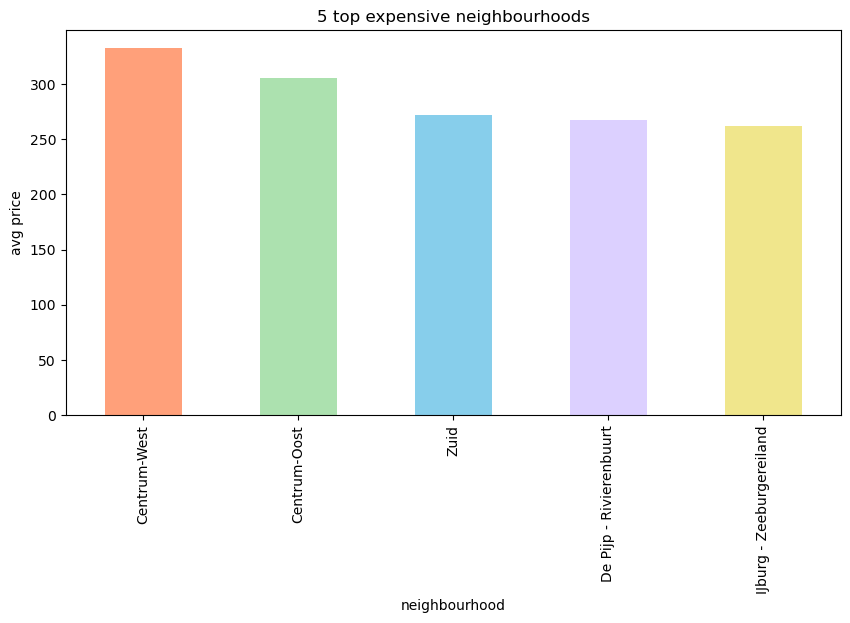

In [109]:
# 2.7.2. Plot and display the top 5 most expensive neighbourhoods
plt.figure(figsize=(10, 5))
colour_list = ['#ffa07a', '#ace1af', '#87ceeb', '#dcd0ff', '#f0e68c']
top5_list.plot(kind='bar', color = colour_list)
plt.title('5 top expensive neighbourhoods')
plt.xlabel('neighbourhood')
plt.ylabel('avg price')
plt.show()